In [1]:
import netCDF4 as nc
import pylab as plt
import numpy as np
import matplotlib
import numpy.ma as MA

## Import data

In [2]:
data = nc.Dataset('/shared/netscratch/ptg21/UM_data/xltln/xltln_ch4.nc')
ch4 = data.variables['ch4'][:]*28/16.*1e9 #ppb

In [3]:
press_xl_data = nc.Dataset('/shared/netscratch/ptg21/UM_data/xltln/xltln_p.nc')
press_xl = press_xl_data.variables['p']

In [4]:
trop_press_xl_data = nc.Dataset('/shared/netscratch/ptg21/UM_data/xltln/xltln_troppres.nc')
trop_press_xl = trop_press_xl_data.variables['trop_p']

## Make tropospheric mask

In [5]:
trop_mask_xl = MA.masked_where(press_xl < trop_press_xl[:][:,None,:,:], press_xl) #add extra dimension
#print(press_lbc)

In [6]:
#apply trop masks to methane data
ch4_trop_xl = MA.masked_where(trop_mask_xl.mask,ch4)

### Plot to check

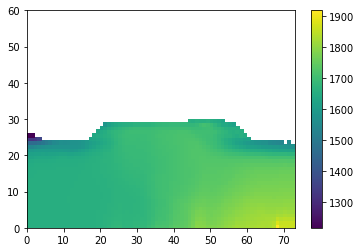

In [7]:
plt.pcolormesh(np.mean(ch4_trop_xl, axis=(0,3)))
#average over axes 0:time and 3:longitude to get zonal mean
plt.colorbar()